# Convolution in Keras

Compared to Dense layers, **which having every neuron in a layer connected to every neuron in the previous layer**, Convolution layers connect to the previous by **kernels**.

Therefore, there are fewer weights in CNNs

例如，Dense層有50個neurons，前一層也有50個neurons，則總共有2500個weights <br/>
而假設我一層*Conv2D*中的kernel_size設為3，則代表這一層的每個neurons只會連到前一層的9個neurons

In [2]:
# import convolution layers in 2-Dimensional image
from keras.layers import Conv2D

# Use a Flatten layer to be like a bridge between a convolution layer and a dense layer
from keras.layers import Flatten

# Other modules are the same
from keras.layers import Dense
from keras.models import Sequential    # 仍然使用Sequential model

Using TensorFlow backend.


Flatten layers 可將 Kernels 跑出的 **Feature Maps** flatten into **arrays**

In [3]:
import numpy as np
import pandas as pd

## Example 1

### Import and process training data

In [4]:
# Import the independent variables of the training data
import gzip
f = gzip.open('MNIST dataset/Training/train-images-idx3-ubyte.gz','r')

image_size = 28
num_images = 5000

f.read(16)
buf = f.read(image_size * image_size * num_images)
X_train = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
X_train = X_train.reshape(num_images, image_size, image_size, 1)
print(X_train.shape)
# X_train[10,:]

(5000, 28, 28, 1)


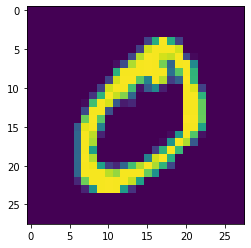

In [5]:
import matplotlib.pyplot as plt
image = np.asarray(X_train[1]).squeeze()
plt.imshow(image)
plt.show()

In [6]:
# Import the labels of the training data
import gzip
f = gzip.open('MNIST dataset/Training/train-labels-idx1-ubyte.gz','r')

num_images = 5000

f.read(16)
buf = f.read(num_images)
y_train = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
print(y_train.shape)
print(y_train[0:10])

(5000,)
[1. 4. 3. 5. 3. 6. 1. 7. 2. 8.]


### Converting the labels into dummy variables

In [7]:
# ===== Function =====
def dummies(n, labels):
    # The number of image categories
    n_categories = n

    # The unique values of categories in the data
    categories = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

    # Initialize ohe_labels as all zeros
    ohe_labels = np.zeros((len(labels), n_categories))

    # Loop over the labels
    for ii in range(len(labels)):
        # Find the location of this label in the categories variable
        jj = np.where(labels[ii] == categories)
        # Set the corresponding zero to one
        ohe_labels[ii,jj] = 1

    return ohe_labels

In [8]:
y_train = dummies(10, y_train)
y_train.shape

(5000, 10)

### Import and process testing data

In [9]:
# Import the independent variables of the testing data
f = gzip.open('MNIST dataset/Validating/t10k-images-idx3-ubyte.gz','r')

image_size = 28
num_images = 2000

f.read(16)
buf = f.read(image_size * image_size * num_images)
X_test = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
X_test = X_test.reshape(num_images, image_size, image_size, 1)
print(X_test.shape)

(2000, 28, 28, 1)


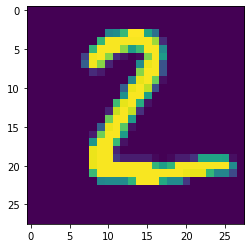

In [10]:
import matplotlib.pyplot as plt
image = np.asarray(X_test[1]).squeeze()
plt.imshow(image)
plt.show()

In [11]:
# Import the labels of the testing data
import gzip
f = gzip.open('MNIST dataset/Validating/t10k-labels-idx1-ubyte.gz','r')

num_images = 2000

f.read(16)
buf = f.read(num_images)
y_test = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
print(y_test.shape)
print(y_test[0:10])

(2000,)
[5. 9. 0. 6. 9. 0. 1. 5. 9. 7.]


### A simpler way

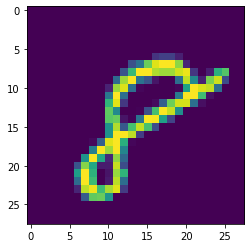

8

In [114]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

import matplotlib.pyplot as plt
image = np.asarray(X_train[59999]).squeeze()
plt.imshow(image)
plt.show()

y_train[59999]

In [115]:
X_train.shape

(60000, 28, 28)

In [113]:
# Training data
X_train = X_train.reshape(10000,28,28,1)
print(X_train.shape)
# y_train = y_train[0:10000]
y_train = dummies(10, y_train)
print(y_train.shape)

# Testing data
X_test = X_test.reshape(10000,28,28,1)
print(X_test.shape)
print(y_test.shape)

(10000, 28, 28, 1)
(10000, 10)
(10000, 28, 28, 1)
(10000,)


In [117]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [109]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]])

---

### Set up the model

## Visualisation of the model just built

![](Image/Image6.jpg)

1. One Image input (28 * 28 pixels) are passed into a convolution layer (10 neurons). 
2. Then the output feature map is flatten by Flatten layer 
3. The flatten feature map is passed into the output layer (Dense with 10 neurons --> 10 output classes)

In [12]:
model = Sequential()

model.add(Conv2D(10, kernel_size = 3, activation = 'relu', input_shape = (28, 28, 1)))

model.add(Flatten())

model.add(Dense(10, activation = 'relu'))

In [13]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

### Training the model

In [14]:
from keras.callbacks import EarlyStopping

# Set up Early Stopping Monitor
early_stopping_monitor = EarlyStopping(patience = 2)

# Fit the model
model.fit(X_train, y_train, validation_split = 0.2, epochs = 2, callbacks = [early_stopping_monitor], batch_size=10)

Train on 4000 samples, validate on 1000 samples
Epoch 1/2
4000/4000 [==============================] - 2s 560us/step - loss: nan - accuracy: 0.0938 - val_loss: nan - val_accuracy: 0.1000
Epoch 2/2
4000/4000 [==============================] - 1s 247us/step - loss: nan - accuracy: 0.0948 - val_loss: nan - val_accuracy: 0.1000


In [15]:
y_pred = model.predict_classes(X_test)
y_pred.shape

(2000,)

In [16]:
y_pred[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [17]:
y_test[0:20]

array([5., 9., 0., 6., 9., 0., 1., 5., 9., 7., 3., 4., 9., 6., 6., 5., 4.,
       0., 7., 4.], dtype=float32)

---

# Tweaking the convolution model

## Zero Padding methodology

![](Image/Kernel1.jpg)

由上圖可發現，Feature map的size = 2 * 2，然而原本的image的size = 4 * 4，這是因為kernel的size = 3 * 3 <br/>
如果每次用kernel都會使size減少，這樣會限制convolution layers的數量

為了讓Feature map和image的size一致，可以用**Zero Padding**方法：

將原本的image外面包一層數值為0的pixel，如下圖 (以size = 5的image表示)：

![](Image/Image7.jpg)


### Zero Padding in Keras

padding = 'valid' 代表沒有加入zero padding (default) <br/>
padding = 'same' 代表前一層會加入zero padding，因此這一層的size = 前一層的size

In [22]:
model = Sequential()

model.add(Conv2D(10, kernel_size = 3, activation = 'relu', input_shape = (28, 28, 1), padding = 'same'))

model.add(Flatten())

model.add(Dense(10, activation = 'relu'))

## Kernel Stride (大步走)

kernel在image上移動時，不一定要一個pixel一個pixel這樣掃，可能會太久，因此可以調整kernel一次移動的距離 <br/>
也是可以在Convonlution layer透過傳入Argument來調整 <br/>
strides = 1為default，代表step size = 1

In [23]:
model = Sequential()

model.add(Conv2D(10, kernel_size = 3, activation = 'relu', input_shape = (28, 28, 1), strides = 2))

model.add(Flatten())

model.add(Dense(10, activation = 'relu'))

Kernel一次跨過多個pixels也代表其輸出的feature map的size會比原image小

![](Image/Image8.jpg)

## Size of the output feature map

Formula:
$$O = ((I - K + 2P)/S) + 1$$

Where <br/>
I = size of the input <br/>
K = size of the kernel <br/>
P = size of the zero padding <br/>
S = strides

## Dilated Convolution

The spacing between the pixels affected by the kernel

![](Image/Image9.jpg)

這時，雖然kernel的size = 3 * 3，但是卻能大致涵蓋了跟size = 5 * 5的kernel一樣的面積 <br/>
同樣的，也可以透過Convolution layer中的argument來調整

In [24]:
model = Sequential()

model.add(Conv2D(10, kernel_size = 3, activation = 'relu', input_shape = (28, 28, 1), dilation_rate = 2))

model.add(Flatten())

model.add(Dense(10, activation = 'relu'))